<a href="https://colab.research.google.com/github/nikhiltarte/TensorFlow-DeepLearning/blob/main/TF_Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Upload Dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd 'gdrive/MyDrive/Colab Notebooks/Datasets'
!ls

/content/gdrive/MyDrive/Colab Notebooks/Datasets
'25_0_0_20170102233320979 (1).jpg'
'25_0_0_20170102233320979 (2).jpg'
'25_0_0_20170102233320979 (3).jpg'
 25_0_0_20170102233320979.jpg
 25_0_0_20170102233508810.jpg
 25_0_0_20170104004136182.jpg
 25_0_0_20170104004153743.jpg
 25_0_0_20170104011143168.jpg
 25_0_0_20170104011300160.jpg
 25_0_0_20170113210126947.jpg
 42_0_0_20170103181301064.jpg
'42_0_0_20170104204536019 (1).jpg'
 42_0_0_20170104204536019.jpg
 42_0_0_20170104204810195.jpg
 60_0_0_20170104212556604.jpg
 6_0_0_20170116201052637.jpg
 6_0_0_20170117192243284.jpg
 ageDataset.zip
 fe61dba545c0b8b87a722cad8408d37d.jpg
'kj (1).jpg'
 kj.jpg
'kritiphoto(tSAcYdmcY6e) (1).png'
'kritiphoto(tSAcYdmcY6e).png'
'WhatsApp Image 2021-07-05 at 10.46.26 PM.jpeg'
'WhatsApp Image 2021-07-05 at 10.48.06 PM.jpeg'
'WhatsApp Image 2021-07-05 at 10.49.07 PM.jpeg'
'WhatsApp Image 2021-07-05 at 10.49.57 PM.jpeg'
'WhatsApp Image 2021-07-05 at 10.50.49 PM.jpeg'
'WhatsApp Image 2021-07-05 at 10.51.36 PM.jp

In [4]:
import os
import zipfile

local_zip = 'ageDataset.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
!ls /tmp/Dataset

25-30  42-48  60-98  6-20  AgeDataset_Split


In [6]:
!pip install split_folders
import splitfolders
input_folder = "/tmp/Dataset"
output_folder = "/tmp/Dataset/AgeDataset_Split" #where you want the split datasets saved. one will be created if none is set

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.7, .2, .1)) 
!ls "/tmp/Dataset/AgeDataset_Split"

Copying files: 9097 files [00:01, 8134.67 files/s]


test  train  val


In [7]:
base_dir = '/tmp/Dataset/AgeDataset_Split'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')


train_25_30_dir = os.path.join(train_dir, '25-30')
train_42_48_dir = os.path.join(train_dir, '42-48')
train_60_98_dir = os.path.join(train_dir, '60-98')
train_6_20_dir = os.path.join(train_dir, '6-20')

val_25_30_dir = os.path.join(validation_dir, '25-30')
val_42_48_dir = os.path.join(validation_dir, '42-48')
val_60_98_dir = os.path.join(validation_dir, '60-98')
val_6_20_dir = os.path.join(validation_dir, '6-20')

test_25_30_dir = os.path.join(test_dir, '25-30')
test_42_48_dir = os.path.join(test_dir, '42-48')
test_60_98_dir = os.path.join(test_dir, '60-98')
test_6_20_dir = os.path.join(test_dir, '6-20')


print('Total Train 6-20 images :', len(os.listdir(train_6_20_dir)))
print('Total Train 25-30 images :', len(os.listdir(train_25_30_dir)))
print('Total Train 42-48 images :', len(os.listdir(train_42_48_dir)))
print('Total Train 60-98 images :', len(os.listdir(train_60_98_dir)))

num_train_examples = len(os.listdir(train_6_20_dir)) + len(os.listdir(train_25_30_dir)) + len(os.listdir(train_42_48_dir)) + len(os.listdir(train_60_98_dir))
num_test_examples = len(os.listdir(test_6_20_dir)) + len(os.listdir(test_25_30_dir)) + len(os.listdir(test_42_48_dir)) + len(os.listdir(test_60_98_dir))

print('Total Validation 6-20 images :', len(os.listdir(val_6_20_dir)))
print('Total Validation 25-30 images :', len(os.listdir(val_25_30_dir)))
print('Total Validation 42-48 images :', len(os.listdir(val_42_48_dir)))
print('Total Validation 60-98 images :', len(os.listdir(val_60_98_dir)))


print('Total Test 6-20 images :', len(os.listdir(test_6_20_dir)))
print('Total Test 25-30 images :', len(os.listdir(test_25_30_dir)))
print('Total Test 42-48 images :', len(os.listdir(test_42_48_dir)))
print('Total Test 60-98 images :', len(os.listdir(test_60_98_dir)))

Total Train 6-20 images : 1759
Total Train 25-30 images : 1746
Total Train 42-48 images : 1007
Total Train 60-98 images : 1854
Total Validation 6-20 images : 502
Total Validation 25-30 images : 499
Total Validation 42-48 images : 287
Total Validation 60-98 images : 529
Total Test 6-20 images : 253
Total Test 25-30 images : 250
Total Test 42-48 images : 145
Total Test 60-98 images : 266


In [8]:
train_6_20_fnames = os.listdir( train_6_20_dir )
train_25_30_fnames = os.listdir( train_25_30_dir )
train_42_48_fnames = os.listdir( train_42_48_dir )
train_60_98_fnames = os.listdir( train_60_98_dir )


print(train_6_20_fnames[:10])
print(train_25_30_fnames[:10])
print(train_42_48_fnames[:10])
print(train_60_98_fnames[:10])


['8_1_0_20170109204251231.jpg', '19_0_0_20170116212106328.jpg', '16_1_4_20170103233333235.jpg', '7_1_3_20161219225222280.jpg', '15_1_0_20170109214409051.jpg', '9_1_2_20170102235115156.jpg', '14_1_4_20170103201225838.jpg', '16_1_4_20170103223310543.jpg', '10_1_0_20170109203924076.jpg', '8_1_1_20170117135414790.jpg']
['26_1_1_20170113001517730.jpg', '25_1_4_20170117193933452.jpg', '29_0_0_20170117202637960.jpg', '29_0_3_20170119195309387.jpg', '30_1_3_20170104223046816.jpg', '30_1_3_20170104231929137.jpg', '26_1_1_20170116154727986.jpg', '25_1_3_20170104232025362.jpg', '26_1_1_20170113012346273.jpg', '26_1_2_20170104015741532.jpg']
['42_1_2_20170116162349143.jpg', '48_0_1_20170117173143196.jpg', '42_0_3_20170119204433431.jpg', '46_0_0_20170113185333766.jpg', '42_0_0_20170117185757210.jpg', '42_0_4_20170117185618130.jpg', '46_1_0_20170104170621792.jpg', '45_0_3_20170119175445883.jpg', '48_1_0_20170110125249128.jpg', '43_0_3_20170119164231565.jpg']
['88_1_0_20170120230317497.jpg', '65_1_0_

In [9]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 7

pic_index = 0 # Index for iterating over images

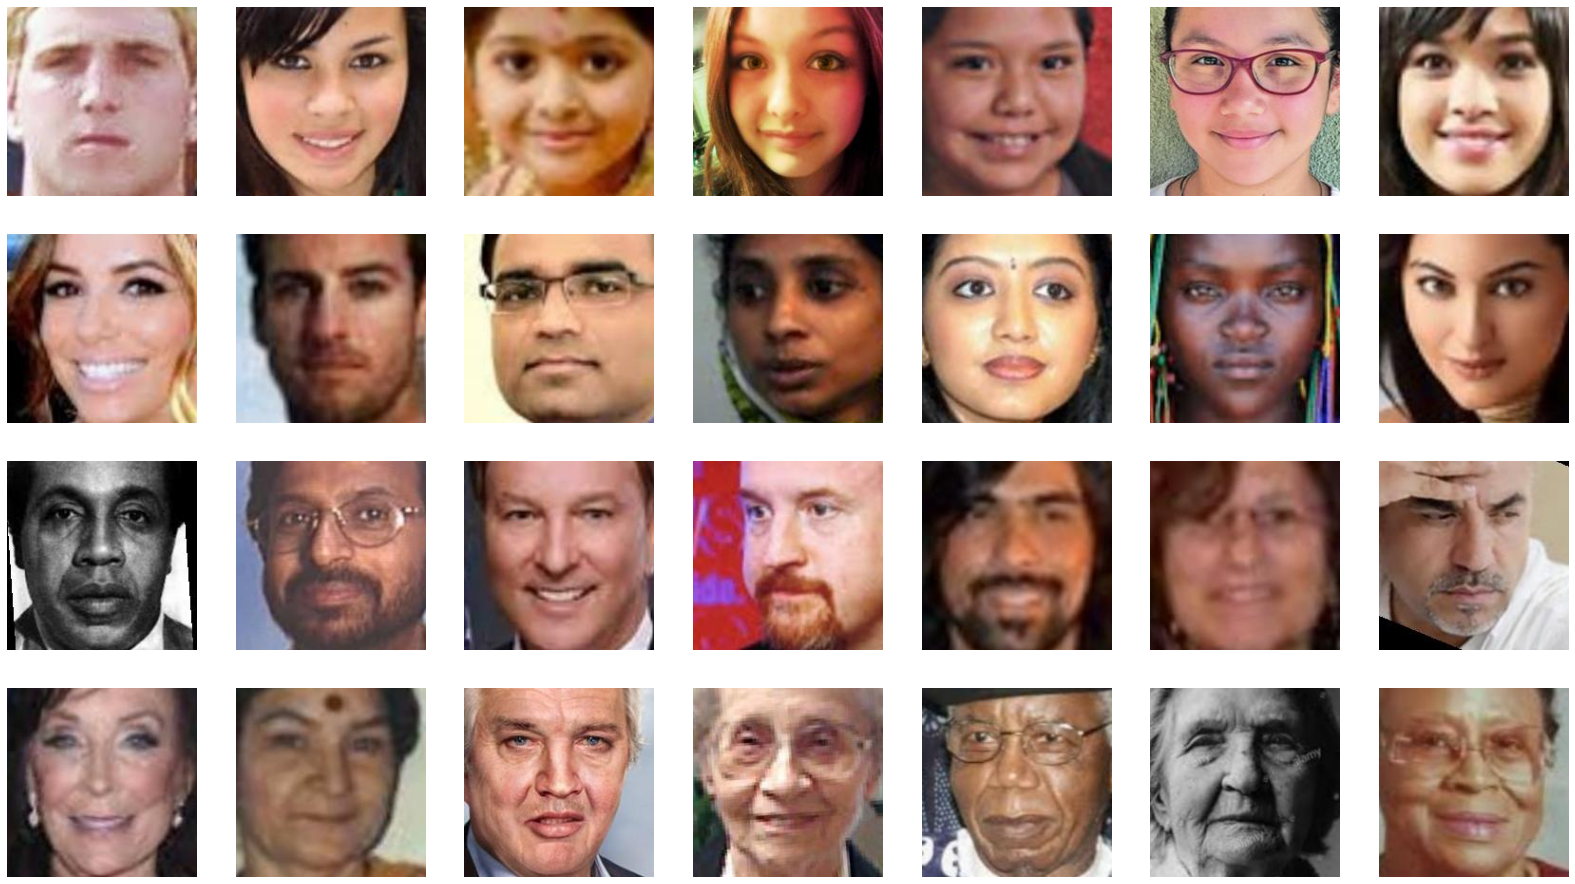

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_6_20_pix = [os.path.join(train_6_20_dir, fname) 
                for fname in train_6_20_fnames[ pic_index-7:pic_index] 
               ]

next_25_30_pix = [os.path.join(train_25_30_dir, fname) 
                for fname in train_25_30_fnames[ pic_index-7:pic_index] 
               ]

next_42_48_pix = [os.path.join(train_42_48_dir, fname) 
                for fname in train_42_48_fnames[ pic_index-7:pic_index] 
               ]
              
next_60_98_pix = [os.path.join(train_60_98_dir, fname) 
                for fname in train_60_98_fnames[ pic_index-7:pic_index] 
               ]


for i, img_path in enumerate(next_6_20_pix + next_25_30_pix + next_42_48_pix + next_60_98_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


Building Model

In [11]:
import tensorflow as tf

In [12]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x200 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation=tf.nn.softmax)  
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [19]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(200, 200))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (200, 200))

test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (200, 200))

Found 6366 images belonging to 5 classes.
Found 1817 images belonging to 5 classes.
Found 914 images belonging to 5 classes.


In [20]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_steps=50,
                    verbose=2)

Epoch 1/30
100/100 - 4s - loss: 1.3561 - accuracy: 0.7994 - val_loss: 1.1819 - val_accuracy: 0.8094
Epoch 2/30
100/100 - 4s - loss: 1.1292 - accuracy: 0.8242 - val_loss: 1.0511 - val_accuracy: 0.8444
Epoch 3/30
100/100 - 4s - loss: 0.9557 - accuracy: 0.8567 - val_loss: 0.9228 - val_accuracy: 0.8492
Epoch 4/30
100/100 - 4s - loss: 0.8794 - accuracy: 0.8641 - val_loss: 0.9242 - val_accuracy: 0.8554
Epoch 5/30
100/100 - 4s - loss: 0.8094 - accuracy: 0.8770 - val_loss: 0.9138 - val_accuracy: 0.8748
Epoch 6/30
100/100 - 4s - loss: 0.7548 - accuracy: 0.8871 - val_loss: 0.8076 - val_accuracy: 0.8742
Epoch 7/30
100/100 - 4s - loss: 0.6772 - accuracy: 0.8991 - val_loss: 0.7243 - val_accuracy: 0.8892
Epoch 8/30
100/100 - 4s - loss: 0.6478 - accuracy: 0.8967 - val_loss: 0.8520 - val_accuracy: 0.8758
Epoch 9/30
100/100 - 4s - loss: 0.5918 - accuracy: 0.9065 - val_loss: 0.7319 - val_accuracy: 0.8836
Epoch 10/30
100/100 - 4s - loss: 0.5754 - accuracy: 0.9121 - val_loss: 0.7544 - val_accuracy: 0.8974

Text(0.5, 1.0, 'Training and validation loss')

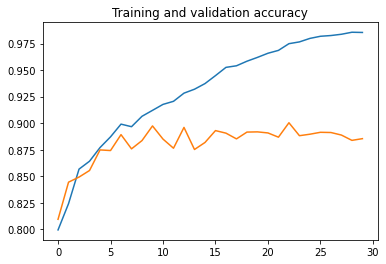

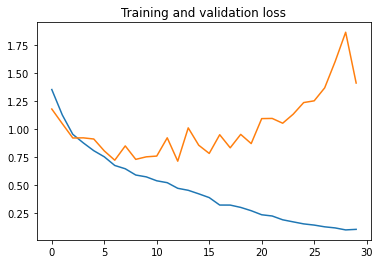

In [21]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [22]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Accuracy on test dataset:', test_accuracy)

46/46 [==============================] - 1s 31ms/step - loss: 1.3388 - accuracy: 0.8952
Accuracy on test dataset: 0.8951861262321472


In [38]:
Class = ['Men 25-30', 'Senior 40-48', 'Child 6-20', 'Old 60-98', ]

Saving 6_0_0_20170110224828816.jpg to 6_0_0_20170110224828816.jpg
Child 6-20
[[0. 0. 1. 0. 0.]]


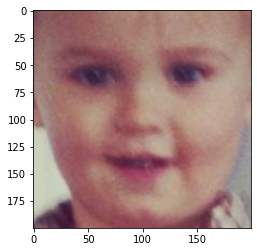

In [41]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path= fn
  img=image.load_img(path, target_size=(200, 200))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  

  plt.imshow(img)

  classes = model.predict(images, batch_size=10)
  
  print(Class[np.argmax(classes)])
  print(classes)
  

  
  